# Lab 3- Decision Trees
## michelle.carney@berkeley.edu
## Data Mining 290T
### Team: Michelle, Carina, Shannon, Lucia

This assignment uses a dataset obtained from the JSE Data Archive that aims at identifying whether there is a statistically significant dependence between gender and biological/activity traits in humans. 

FEATURE DESCRIPTIONS: 

<ul>
<li>Color (Blue, Brown, Green, Hazel, Other)
<li>Age (in years)
<li>YearinSchool (First, Second, Third, Fourth, Other)
<li>Height (in inches)
<li>Miles (distance from home town of student to Ames, IA) 
<li>Brothers (number of brothers)
<li>Sisters (number of sisters)
<li>CompTime (number of hours spent on computer per week)
<li>Exercise (whether the student exercises Yes or No)
<li>ExerTime (number of hours spent exercising per week)
<li>MusicCDs (number of music CDs student owns)
<li>PlayGames (number of hours spent playing games per week)
<li>WatchTV (number of hours spent watching TV per week
</ul>

https://ww2.amstat.org/publications/jse/jse_data_archive.htm

In [90]:
from __future__ import division
from collections import Counter, defaultdict
from itertools import combinations 
import pandas as pd
import numpy as np
import math
import operator
import sklearn
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from IPython.display import Image  
import pydotplus 

In [91]:
df = pd.read_csv('Eye_Color.csv')

df.head()

,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
0,female,18,first,hazel,68.0,195.0,0,1,20.0,Yes,3.0,75.0,6.0,18.0
1,male,20,third,brown,70.0,120.0,3,0,24.0,No,0.0,50.0,0.0,3.0
2,female,18,first,green,67.0,200.0,0,1,35.0,Yes,3.0,53.0,8.0,1.0
3,male,23,fourth,hazel,74.0,140.0,1,1,5.0,Yes,25.0,50.0,0.0,7.0
4,female,19,second,blue,62.0,60.0,0,1,5.0,Yes,4.0,30.0,2.0,5.0


In [92]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df = df.reset_index(drop=True)

# Calculating Gini Index 



**Question 1: How many rows are there in the dataset for males? For females? **

There are 910 rows for males and 1078 rows for females in the dataset



In [93]:
len(df)

1988

In [94]:
num_males = len(df[(df.loc[:,'gender'] == 'male')])
num_females =len(df[df['gender']=='female'])

print(num_males)
print(num_females)

910
1078


**Question 2: What is the Gini Index of this dataset, using males and females as the target classes?**

The Gini Index in this dataset is 0.496.

In [95]:
prob_female = num_females / len(df)
print(prob_female)
prob_male = num_males / len(df)
print(prob_male)

0.5422535211267606
0.45774647887323944


In [96]:
gini_ind_or = 1 - (math.pow(prob_male,2) + math.pow(prob_female,2))
gini_ind_or

0.4964292799047807

## Best Split of a Numeric Feature

**Question 3: What is the best split point of the 'height' feature. **

It's at 885 - height 68.0.

In [97]:
df.sort_values(by='height', inplace=True)


In [98]:
df = df.reset_index(drop=True)
df.head()

,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
0,female,20,third,blue,44.0,30.0,0,1,7.0,Yes,4.0,200.0,0.0,5.0
1,female,19,second,blue,52.0,0.0,2,1,4.0,Yes,4.0,200.0,1.0,4.0
2,female,21,third,green,54.0,64.0,1,1,10.0,Yes,3.0,113.0,0.0,6.0
3,female,18,first,blue,56.0,570.0,0,1,12.0,Yes,14.0,100.0,21.0,14.0
4,female,20,third,brown,56.0,165.0,1,3,16.0,No,0.0,80.0,0.0,14.0


In [99]:
height_col = df['height']
height_col[0]

44.0

In [100]:
start_ind = 0
sec_ind = 1

gini_ind_list = []
first_para_list = []

while sec_ind <len(df): #while not at the end of the list, continue
    first_para = height_col[start_ind] #first parameter
    #print(first_para)
    second_para = height_col[sec_ind] #second parameter
    #print(second_para)
    left_side = df[df['height'] <= first_para] #df for left side
    right_side = df[df['height'] > first_para] #df for right side
    num_left = len(left_side) #count of entries below threshold
    num_right = len(right_side) #count of entries above threshold
    num_fem_left = len(left_side[left_side['gender'] == 'female'])
    num_male_left = len(left_side[left_side['gender'] == 'male'])
    num_fem_right = len(right_side[right_side['gender'] == 'female'])
    num_male_right = len(right_side[right_side['gender'] == 'male'])
    prob_fem_left = num_fem_left / num_left
    prob_male_left = num_male_left / num_left
    prob_fem_right = num_fem_right / num_right
    prob_male_right = num_male_right / num_right
    gini_ind_left = 1 - (math.pow(prob_male_left,2) + math.pow(prob_fem_left,2))
    gini_ind_right = 1 - (math.pow(prob_male_right,2) + math.pow(prob_fem_right,2))
    gini_ind = (num_left * gini_ind_left + num_right * gini_ind_right) / (num_left + num_right)
    gini_ind_list.append(gini_ind)
    first_para_list.append(first_para)
    start_ind += 1
    sec_ind += 1


In [101]:
print(min(gini_ind_list))
opt_ind = gini_ind_list.index(min(gini_ind_list))
print(first_para_list[opt_ind])

0.2655288120702919
68.0


In [102]:
df.iloc[opt_ind,:]

gender             male
age                  21
year             fourth
eyecolor          brown
height               68
miles               236
brothers              1
sisters               1
computertime         10
exercise             No
exercisehours         0
musiccds             50
playgames             1
watchtv              10
Name: 885, dtype: object

**Question 4: What is the Gini Index of this best split?**

Gini index of this best split is 0.26

In [103]:
print(min(gini_ind_list))

0.2655288120702919


**Question 5: How much does this partitioning reduce the Gini Index over that of the overall dataset?**

It reduces the original gini index by 0.23.

In [104]:
gini_ind_or - min(gini_ind_list)

0.2309004678344888

**Question 6: How many 'female' rows are below your best split point? 'male' rows?**

There are 273 female rows below and 830 males

In [105]:
bottom_df = df[opt_ind:]
num_fem_bottom = len(bottom_df[bottom_df['gender'] == 'female'])
print(num_fem_bottom)
num_male_bottom = len(bottom_df[bottom_df['gender'] == 'male'])
print(num_male_bottom)

273
830


**Question 7: How many 'female' rows are above your best split point? 'male' rows?**

There are 805 females and 80 males above the optimal split point.

In [106]:
top_df = df[:opt_ind]
num_fem_top = len(top_df[top_df['gender'] == 'female'])
print(num_fem_top)
num_male_top = len(top_df[top_df['gender'] == 'male'])
print(num_male_top)

805
80


Recall that, to calculate the best split of this numeric field, you'll need to order your data by 'height', then consider the midpoint between each pair of consecutive heights as a potential split point, then calculate the Gini Index for that partitioning. You'll want to keep track of the best split point and its Gini Index (remember that you are trying to minimize the Gini Index). 

There are a lot of ways to do this. Some are very fast, others very slow. One tip to make this run quickly is, as you consecutively step through the data and calculate the Gini Index of each possible split point, keep a running total of the number of rows for each candidate that are located above and below the split point. 

Some Python tips: 

* Counter(), from the collections module, is a special dictionary for counting values of a key
* zip() lets you concatenate lists into a list of tuples (for example, if we have a list of the candidates and a list of transaction amounts, zip(candidate_list, transaction_amount) would give us a list of (candidate, transaction amount) pairs

## Best Split of a Categorial Variable

**Question 8: How many possible splits are there of the eyecolor feature?**

There are 15 possible splits.

In [107]:
cat_colors = df['eyecolor'].unique()
poss_combinations = []
for item in combinations(cat_colors,1):
    poss_combinations.append(item)
for item in combinations(cat_colors,2):
    poss_combinations.append(item)
len(poss_combinations)

15

**Question 9: Which split of eyecolor best splits the female and male rows, as measured by the Gini Index?**

The best split is when we use 'green' by itself vs. all other eye colors.

In [108]:
total_set = set(cat_colors)
right_col = []
for item in poss_combinations:
    subset = set(item)
    right_col.append(tuple(total_set - subset))
    
right_col

combs = {'combinations': poss_combinations, 'complements': right_col}
comb_df = pd.DataFrame(data=combs)
comb_df

,combinations,complements
0,"(blue,)","(other, hazel, green, brown)"
1,"(green,)","(other, hazel, blue, brown)"
2,"(brown,)","(other, hazel, green, blue)"
3,"(hazel,)","(blue, other, green, brown)"
4,"(other,)","(blue, hazel, green, brown)"
5,"(blue, green)","(other, hazel, brown)"
6,"(blue, brown)","(other, hazel, green)"
7,"(blue, hazel)","(other, green, brown)"
8,"(blue, other)","(hazel, green, brown)"
9,"(green, brown)","(other, hazel, blue)"


In [109]:
def determineGini (column, index):
    count = len(comb_df[column][index])
    item = comb_df[column][index]
    if count > 1:
        total_fem = 0
        total_male = 0
        for col in item:
            new_df = df[df['eyecolor'] == col]
            total_len = len(new_df)# number of people with this eye color
            num_fem = len(new_df[new_df['gender'] == 'female'])
            num_male = total_len - num_fem
            total_fem += num_fem
            total_male += num_male
    else:
        col = item[0]
        new_df = df[df['eyecolor'] == col]
        total_len = len(new_df)

        total_fem = len(new_df[new_df['gender'] == 'female'])
        total_male = total_len - total_fem

    prob_male = total_male / (total_male + total_fem)
    prob_fem = total_fem / (total_male + total_fem)
    gini_ind = 1 - (math.pow(prob_male,2) + math.pow(prob_fem,2))
    
    return gini_ind, total_len

gini_list = []

for i in range(0,15):
    gini_ind_left, total_left = determineGini('combinations' , i)
    gini_ind_right, total_right = determineGini('complements', i)
    gini_ind = (total_left * gini_ind_left + total_right * gini_ind_right) / (total_left + total_right)
    gini_list.append(gini_ind)

print(gini_list)



[0.4965382393192283, 0.48629493958954384, 0.49649304864365235, 0.49652645915015603, 0.496033598649653, 0.4967005253306125, 0.4952246606163623, 0.4938323517708188, 0.492321547886767, 0.4947590553072107, 0.49405208204719475, 0.4969331584402623, 0.49632090116507444, 0.49590051222534204, 0.4960687017974789]


In [128]:
print(gini_list.index(min(gini_list)))
comb_df[1:2]

1


,combinations,complements
1,"(green,)","(other, hazel, blue, brown)"


**Question 10: What is the Gini Index of this best split?**

The gini index is 0.48

In [111]:
min(gini_list)

0.48629493958954384

**Question 11: How much does this partitioning reduce the Gini Index over that of the overall data set?**

Only by 0.01

In [112]:
gini_ind_or - min(gini_list)

0.010134340315236856

**Question 12: How many 'female' rows and 'male' rows are in your first partition? How many 'female' rows and 'male' rows are in your second partition?**

There are 190 women and 107 men in my first partition and 888 women and 803 men in my second partition.

Python tip: the combinations function of the itertools module allows you to enumerate combinations of a list

In [113]:
new_df = df[df['eyecolor'] == 'green']
total_fem = len(new_df[new_df['gender'] == 'female'])
total = len(new_df)
total_male = total - total_fem
total_upper = total_fem + total_male
print(total_fem)
print(total_male)

190
107


In [114]:
total_df = len(df)
total_f_total = len(df[df['gender'] == 'female'])
total_male_total = len(df[df['gender'] == 'male'])
female_lower = total_f_total - total_fem
print(female_lower)
male_lower = total_male_total - total_male
print(male_lower)

888
803


## Training a decision tree

**Question 13: Using all of the features in the original dataframe read in at the top of this notebook, train a decision tree classifier that has a depth of three (including the root node and leaf nodes). What is the accuracy of this classifier on the training data?**

The classifier has an accuracy of 0.86

In [115]:
training_data = df[df.columns[1:14]]

training_data = training_data.to_dict('records')
v = DictVectorizer(sparse=False)
X = v.fit_transform(training_data)
gender_data = df['gender']

In [116]:
dt = DecisionTreeClassifier(max_depth=3)
result = dt.fit(X, gender_data)

dt.score(X, gender_data)

0.86468812877263579

**Question 14: Using the following code snippet, export your decision tree to graphviz and visualize it. In your write-up, write down the interpretation of the rule at each node which is used to perform the splitting.**

In [117]:
feat_names = v.get_feature_names()

In [118]:
def visualize_tree(d_tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(d_tree, out_file=f,
                        feature_names=feature_names, class_names=['female','male'],filled=True, rounded=True,special_characters=True)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [119]:
visualize_tree(dt, feat_names)

Feb 14 19:19:00  dot[84012] <Error>: The function ‘CGFontGetGlyphPath’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.
Feb 14 19:19:00  dot[84012] <Error>: The function ‘CGFontGetGlyphPaths’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.



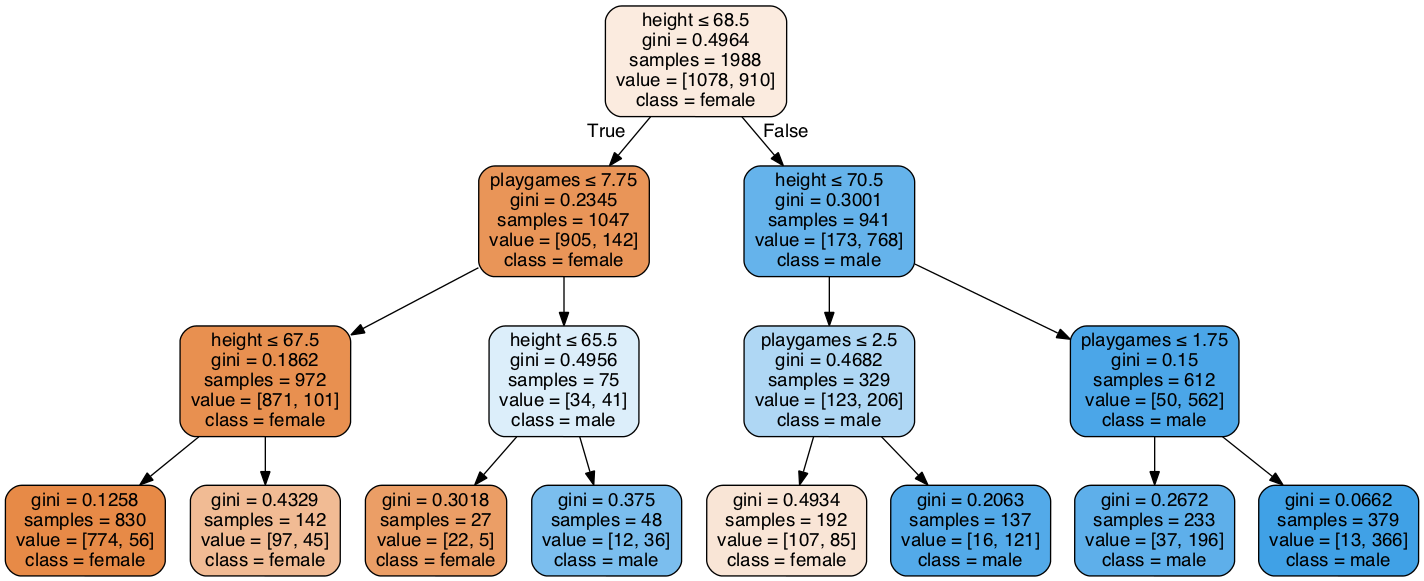

In [120]:
graph = pydotplus.graphviz.graph_from_dot_file("dt.dot")
graph.write_pdf('name.pdf')
Image(graph.create_png())

**Question 15: For each of your leaf nodes, specify the percentage of 'female' rows in that node (out of the total number of rows at that node).**

In [121]:
dt.tree_.children_left #just doing this to reference my returned indices are right as i parse the tree

array([ 1,  2,  3, -1, -1,  6, -1, -1,  9, 10, -1, -1, 13, -1, -1])

In [122]:
dt.tree_.children_right

array([ 8,  5,  4, -1, -1,  7, -1, -1, 12, 11, -1, -1, 14, -1, -1])

In [123]:
def get_leaf_indices(tree, index):
    leaf_indices = []
    if (dt.tree_.children_left[index] == -1) & (dt.tree_.children_right[index] == -1):
        return [index]
    else:
        left = dt.tree_.children_left[index]
        right = dt.tree_.children_right[index]
        return get_leaf_indices(tree, left), get_leaf_indices(tree, right)
        index += 1

In [124]:
leaf_indices = get_leaf_indices(dt, 0)
leaf_indices

((([3], [4]), ([6], [7])), (([10], [11]), ([13], [14])))

In [125]:
leaf_indices = [3,4,6,7,10,11,13,14]

In [126]:
# tree_values = dt.tree_.value(flattened_leaf_2)
tree_values = []
for item in leaf_indices:
    tree_values.append(dt.tree_.value[item])

tree_values

[array([[ 774.,   56.]]),
 array([[ 97.,  45.]]),
 array([[ 22.,   5.]]),
 array([[ 12.,  36.]]),
 array([[ 107.,   85.]]),
 array([[  16.,  121.]]),
 array([[  37.,  196.]]),
 array([[  13.,  366.]])]

In [127]:
percentage_list = []
for i in range(0,8):
    female_quant = tree_values[i][0][0]
    total_quant = tree_values[i][0][0] + tree_values[i][0][1]
    perc_female = (female_quant/total_quant)*100
    percentage_list.append(perc_female)
    leaf_ind = leaf_indices[i]
    print("{0:.1f}% female in node {1:g}".format(perc_female, leaf_ind))
    
percentage_list

93.3% female in node 3
68.3% female in node 4
81.5% female in node 6
25.0% female in node 7
55.7% female in node 10
11.7% female in node 11
15.9% female in node 13
3.4% female in node 14


[93.253012048192772,
 68.309859154929569,
 81.481481481481481,
 25.0,
 55.729166666666664,
 11.678832116788321,
 15.879828326180256,
 3.4300791556728232]

See this notebook for the basics of training a decision tree in scikit-learn and exporting the outputs to view in graphviz: http://nbviewer.ipython.org/gist/tebarkley/b68c04d9b31e64ce6023

Scikit-learn classifiers require class labels and features to be in numeric arrays. As such, you will need to turn your categorical features into numeric arrays using DictVectorizer. This is a helpful notebook for understanding how to do this: http://nbviewer.ipython.org/gist/sarguido/7423289. You can turn a pandas dataframe of features into a dictionary of the form needed by DictVectorizer by using df.to_dict('records'). Make sure you remove the class label first (in this case, gender). If you use the class label as a feature, your classifier will have a training accuracy of 100%! The example notebook link also shows how to turn your class labels into a numeric array using sklearn.preprocessing.LabelEncoder().